In [52]:
import os, time, datetime
import numpy as np
import cv2
from PIL import Image
from skimage.io import imread, imsave, imshow
from scipy import ndimage as ndi
from skimage import feature
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

#'C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/results/Set68/test001_dncnn.png'
#'C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/data/Test/Set68/test001.png'

def show_residual(image_set, sigma):
    for i in range(1,100):
        if image_set is 'CBSD68':
            #C:\Users\nuguz\Documents\GitHub\DnCNN\results\CBSD68\noise=25
            if i>68:
                break
            path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/CBSD68/noise=" + str(sigma) + "/" + str(i)
            label_path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/CBSD68_label/" + str(i)
        
        elif image_set is 'Set12':
            if i>12:
                break
            path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/Set12/DnCNN/noise=" + str(sigma) + "/" + str(i)
            label_path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/Set12/label/" + str(i)
        
        elif image_set is 'BSD68':
            if i>68:
                break
            path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/BSD68/noise=" + str(sigma) + "/" + str(i)
            if i<10:
                label_path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/BSD68/label/test00" + str(i)
            else:
                label_path = "C:/Users/cvlab/Documents/GitHub/DnCNN/results/BSD68/label/test0" + str(i)
        
        origin = np.array(imread(label_path+'.png', dtype=np.float32))
        noise = np.array(imread(path+'_noise.png', dtype=np.float32))
        denoised = np.array(imread(path+'_dncnn.png', dtype=np.float32))
        
        structure = origin - denoised
        structure = np.clip(5 * np.clip(structure,0,255),0,255)
        #cv2.imwrite(path+'_structure.png', structure)
        
        
        residual = noise - denoised
        print(np.histogram(residual))
        mapping = interp1d([np.min(residual),0, np.max(residual)],[0,50,100])
        residual = np.clip(1.5*mapping(np.clip(residual,-150,255)),0,255)
        print(np.histogram(residual))
        cv2.imwrite(path+'_residual.png', residual)

        #imsave('C:/Users/cvlab/Documents/GitHub/DnCNN/TrainingCodes/dncnn_keras/results/Set68/noise.png',n)

        fig = plt.figure(figsize=(15,15))
        fig.subplots_adjust(hspace=0.2, wspace=0.2)
        ax = fig.add_subplot(1,4,1)
        ax.set_title('original')
        ax.imshow(origin,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,2)
        ax.set_title('noise image')
        ax.imshow(noise,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,3)
        ax.set_title('denoised image')
        ax.imshow(denoised,interpolation='nearest',cmap='gray')

        ax = fig.add_subplot(1,4,4)
        ax.set_title('residual')
        ax.imshow(residual,interpolation='nearest',cmap='gray')
        
        print(i)
        #plt.show()
        

(array([   71,   709,  3245,  9759, 22047, 16873,  9863,  2684,   271,
          14], dtype=int64), array([-176. , -139.7, -103.4,  -67.1,  -30.8,    5.5,   41.8,   78.1,
        114.4,  150.7,  187. ], dtype=float32))
(array([ 3304,  5863, 10413, 19518, 13216,  8457,  3988,   688,    83,
           6], dtype=int64), array([ 32.38636364,  44.14772727,  55.90909091,  67.67045455,
        79.43181818,  91.19318182, 102.95454545, 114.71590909,
       126.47727273, 138.23863636, 150.        ]))
1
(array([   32,   500,  3315, 11103, 17998, 18846, 11274,  2102,   353,
          13], dtype=int64), array([-186. , -148.6, -111.2,  -73.8,  -36.4,    1. ,   38.4,   75.8,
        113.2,  150.6,  188. ], dtype=float32))
(array([ 4244,  8302, 12577, 15438, 12998,  9103,  2127,   642,    98,
           7], dtype=int64), array([ 34.67741935,  46.20967742,  57.74193548,  69.27419355,
        80.80645161,  92.33870968, 103.87096774, 115.40322581,
       126.93548387, 138.46774194, 150.        ]))
2
(arr

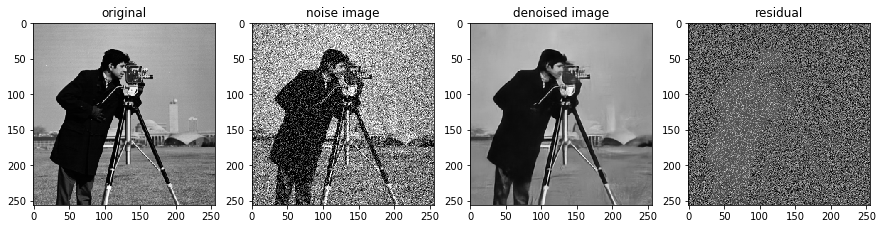

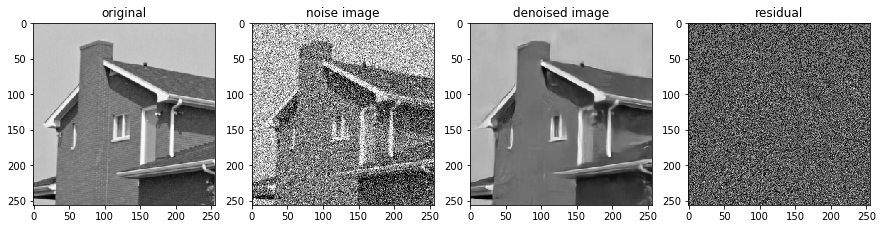

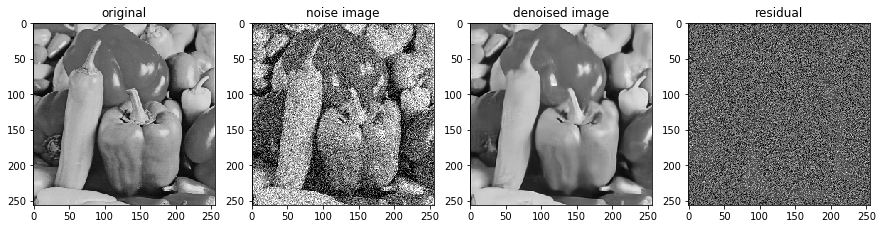

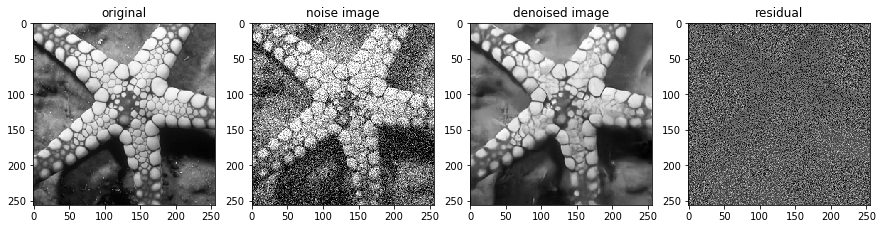

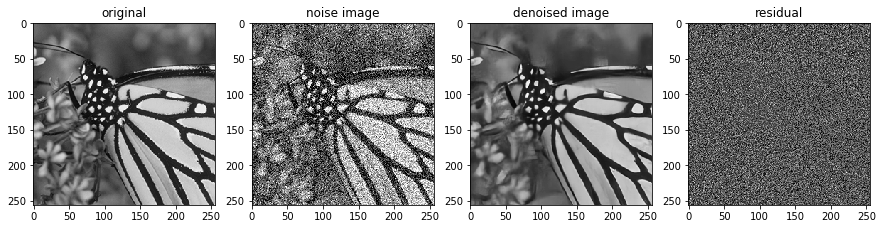

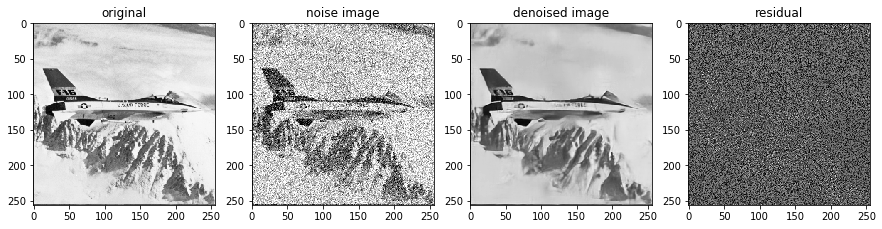

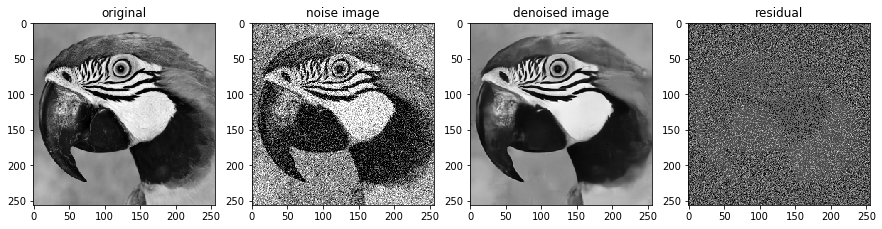

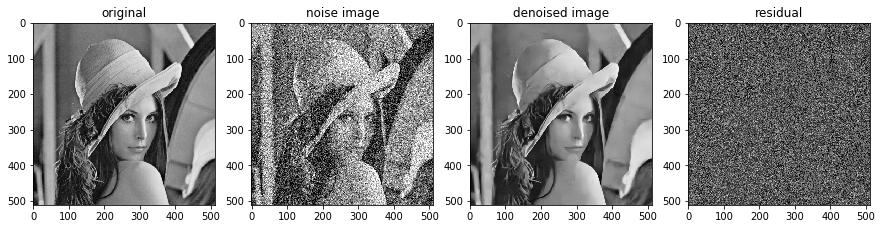

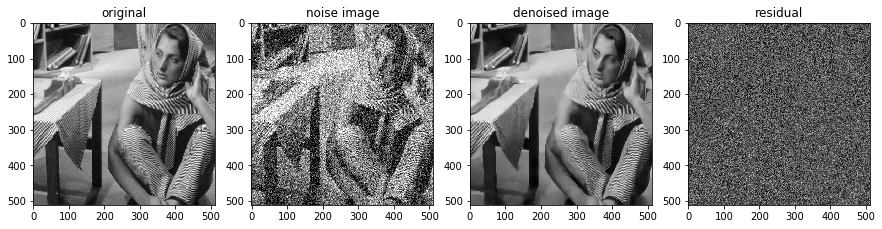

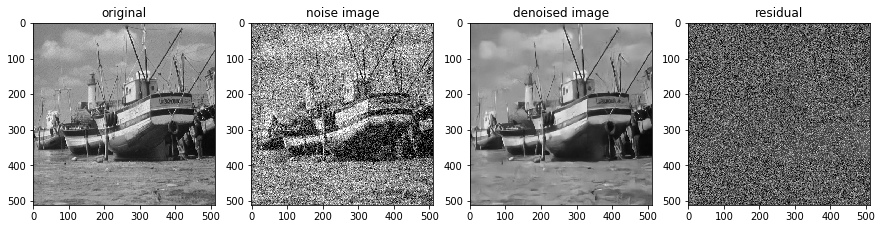

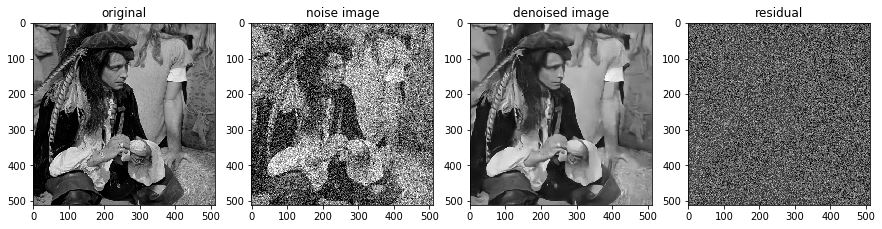

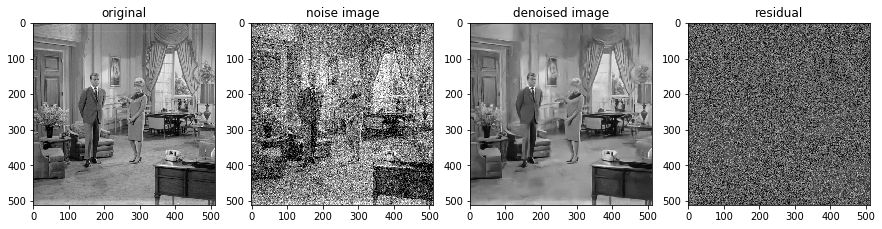

In [53]:
show_residual('Set12', 50)